### Pandas 

From : https://lectures.quantecon.org/py/pandas.html

Pandas is a package of fast, efficient data analysis tools for Python

Its popularity has surged in recent years, coincident with the rise of fields such as data science and machine learning

Here’s a popularity comparison over time against STATA and SAS, courtesy of Stack Overflow Trends


Just as NumPy provides the basic array data type plus core array operations, pandas

1. defines fundamental structures for working with data and

2. endows them with methods that facilitate operations such as
    - reading in data
    - adjusting indices
    - working with dates and time series
    - sorting, grouping, re-ordering and general data munging [1]
    - dealing with missing values, etc., etc.
 
More sophisticated statistical functionality is left to other packages, such as statsmodels and scikit-learn, which are built on top of pandas

This lecture will provide a basic introduction to pandas

Throughout the lecture we will assume that the following imports have taken place

In [1]:
import pandas as pd
import numpy as np

#### Series

Two important data types defined by pandas are **Series** and **DataFrame**

You can think of a Series as a **column** of data, such as a collection of observations on a single variable

A DataFrame is an object for storing related columns of data

Let’s start with Series

In [2]:
s = pd.Series(np.random.randn(4), name='daily returns')
s

0    0.434664
1    0.219918
2    0.419858
3    1.206390
Name: daily returns, dtype: float64

Here you can imagine the indices 0, 1, 2, 3 as indexing four listed companies, and the values being daily returns on their shares

Pandas Series are built on top of NumPy arrays, and support many similar operations

In [3]:
s * 100

0     43.466431
1     21.991798
2     41.985778
3    120.639003
Name: daily returns, dtype: float64

In [4]:
np.abs(s)

0    0.434664
1    0.219918
2    0.419858
3    1.206390
Name: daily returns, dtype: float64

In [5]:
s.describe()

count    4.000000
mean     0.570208
std      0.435281
min      0.219918
25%      0.369873
50%      0.427261
75%      0.627596
max      1.206390
Name: daily returns, dtype: float64

In [6]:
print(type(s.describe()))
print(s.describe()["count"])
print(s.describe()["mean"])

<class 'pandas.core.series.Series'>
4.0
0.570207525996


In [7]:
s.index = ['AMZN', 'AAPL', 'MSFT', 'GOOG']
s

AMZN    0.434664
AAPL    0.219918
MSFT    0.419858
GOOG    1.206390
Name: daily returns, dtype: float64

Viewed in this way, Series are like fast, efficient Python dictionaries (with the restriction that the items in the dictionary all have the same type—in this case, floats)

In fact, you can use much of the same syntax as Python dictionaries

In [8]:
s['AMZN']

0.43466431326370336

In [9]:
s['AMZN'] = 0
s

AMZN    0.000000
AAPL    0.219918
MSFT    0.419858
GOOG    1.206390
Name: daily returns, dtype: float64

In [10]:
'AAPL' in s

True

```none
True
```


### DataFrames

While a Series is a single column of data, a DataFrame is several columns, one for each variable

In essence, a DataFrame in pandas is analogous to a (highly optimized) Excel spreadsheet

Thus, it is a powerful tool for representing and analyzing data that are naturally organized into rows and columns, often with descriptive indexes for individual rows and individual columns

Let’s look at an example that reads data from the CSV file pandas/data/test_pwt.csv that can be downloaded here

Here’s the contents of test_pwt.csv

```none
"country","country isocode","year","POP","XRAT","tcgdp","cc","cg"
"Argentina","ARG","2000","37335.653","0.9995","295072.21869","75.716805379","5.5788042896"
"Australia","AUS","2000","19053.186","1.72483","541804.6521","67.759025993","6.7200975332"
"India","IND","2000","1006300.297","44.9416","1728144.3748","64.575551328","14.072205773"
"Israel","ISR","2000","6114.57","4.07733","129253.89423","64.436450847","10.266688415"
"Malawi","MWI","2000","11801.505","59.543808333","5026.2217836","74.707624181","11.658954494"
"South Africa","ZAF","2000","45064.098","6.93983","227242.36949","72.718710427","5.7265463933"
"United States","USA","2000","282171.957","1","9898700","72.347054303","6.0324539789"
"Uruguay","URY","2000","3219.793","12.099591667","25255.961693","78.978740282","5.108067988"
```


In [11]:
df = pd.read_csv('https://github.com/QuantEcon/QuantEcon.lectures.code/raw/master/pandas/data/test_pwt.csv')
type(df)

pandas.core.frame.DataFrame

In [12]:
df

,country,country isocode,year,POP,XRAT,tcgdp,cc,cg
0,Argentina,ARG,2000,37335.653,0.999500,2.950722e+05,75.716805,5.578804
1,Australia,AUS,2000,19053.186,1.724830,5.418047e+05,67.759026,6.720098
2,India,IND,2000,1006300.297,44.941600,1.728144e+06,64.575551,14.072206
3,Israel,ISR,2000,6114.570,4.077330,1.292539e+05,64.436451,10.266688
4,Malawi,MWI,2000,11801.505,59.543808,5.026222e+03,74.707624,11.658954
5,South Africa,ZAF,2000,45064.098,6.939830,2.272424e+05,72.718710,5.726546
6,United States,USA,2000,282171.957,1.000000,9.898700e+06,72.347054,6.032454
7,Uruguay,URY,2000,3219.793,12.099592,2.525596e+04,78.978740,5.108068


We can select particular rows using standard Python array slicing notation



In [13]:
df[2:5]

,country,country isocode,year,POP,XRAT,tcgdp,cc,cg
2,India,IND,2000,1006300.297,44.941600,1.728144e+06,64.575551,14.072206
3,Israel,ISR,2000,6114.570,4.077330,1.292539e+05,64.436451,10.266688
4,Malawi,MWI,2000,11801.505,59.543808,5.026222e+03,74.707624,11.658954


To select columns, we can pass a list containing the names of the desired columns represented as strings

In [14]:
df[['country', 'tcgdp']]

,country,tcgdp
0,Argentina,2.950722e+05
1,Australia,5.418047e+05
2,India,1.728144e+06
3,Israel,1.292539e+05
4,Malawi,5.026222e+03
5,South Africa,2.272424e+05
6,United States,9.898700e+06
7,Uruguay,2.525596e+04


To select both rows and columns using integers, the **iloc** attribute should be used with the format **.iloc[rows,columns]**



In [15]:
df.iloc[2:5,0:4]

,country,country isocode,year,POP
2,India,IND,2000,1006300.297
3,Israel,ISR,2000,6114.570
4,Malawi,MWI,2000,11801.505


In [16]:
df.index[2:5]

RangeIndex(start=2, stop=5, step=1)

In [17]:
df.loc[df.index[2:5], ['country', 'tcgdp']]

,country,tcgdp
2,India,1.728144e+06
3,Israel,1.292539e+05
4,Malawi,5.026222e+03


In [18]:
df = df[['country','POP','tcgdp']]
df

,country,POP,tcgdp
0,Argentina,37335.653,2.950722e+05
1,Australia,19053.186,5.418047e+05
2,India,1006300.297,1.728144e+06
3,Israel,6114.570,1.292539e+05
4,Malawi,11801.505,5.026222e+03
5,South Africa,45064.098,2.272424e+05
6,United States,282171.957,9.898700e+06
7,Uruguay,3219.793,2.525596e+04


In [19]:
df = df.set_index('country')
df

,POP,tcgdp
country,,
Argentina,37335.653,2.950722e+05
Australia,19053.186,5.418047e+05
India,1006300.297,1.728144e+06
Israel,6114.570,1.292539e+05
Malawi,11801.505,5.026222e+03
South Africa,45064.098,2.272424e+05
United States,282171.957,9.898700e+06
Uruguay,3219.793,2.525596e+04


In [20]:
df.columns = 'population', 'total GDP'
df

,population,total GDP
country,,
Argentina,37335.653,2.950722e+05
Australia,19053.186,5.418047e+05
India,1006300.297,1.728144e+06
Israel,6114.570,1.292539e+05
Malawi,11801.505,5.026222e+03
South Africa,45064.098,2.272424e+05
United States,282171.957,9.898700e+06
Uruguay,3219.793,2.525596e+04


In [21]:
df['population'] = df['population'] * 1e3
df

,population,total GDP
country,,
Argentina,3.733565e+07,2.950722e+05
Australia,1.905319e+07,5.418047e+05
India,1.006300e+09,1.728144e+06
Israel,6.114570e+06,1.292539e+05
Malawi,1.180150e+07,5.026222e+03
South Africa,4.506410e+07,2.272424e+05
United States,2.821720e+08,9.898700e+06
Uruguay,3.219793e+06,2.525596e+04


In [22]:
df['GDP percap'] = df['total GDP'] * 1e6 / df['population']
df

,population,total GDP,GDP percap
country,,,
Argentina,3.733565e+07,2.950722e+05,7903.229085
Australia,1.905319e+07,5.418047e+05,28436.433261
India,1.006300e+09,1.728144e+06,1717.324719
Israel,6.114570e+06,1.292539e+05,21138.672749
Malawi,1.180150e+07,5.026222e+03,425.896679
South Africa,4.506410e+07,2.272424e+05,5042.647686
United States,2.821720e+08,9.898700e+06,35080.381854
Uruguay,3.219793e+06,2.525596e+04,7843.970620


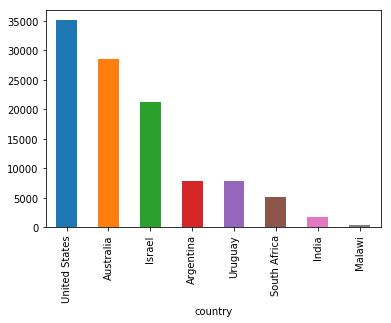

In [39]:
import matplotlib.pyplot as plt
%matplotlib inline
df['GDP percap'].plot(kind='bar')
plt.show()

In [24]:
df = df.sort_values(by='GDP percap', ascending=False)
df

,population,total GDP,GDP percap
country,,,
United States,2.821720e+08,9.898700e+06,35080.381854
Australia,1.905319e+07,5.418047e+05,28436.433261
Israel,6.114570e+06,1.292539e+05,21138.672749
Argentina,3.733565e+07,2.950722e+05,7903.229085
Uruguay,3.219793e+06,2.525596e+04,7843.970620
South Africa,4.506410e+07,2.272424e+05,5042.647686
India,1.006300e+09,1.728144e+06,1717.324719
Malawi,1.180150e+07,5.026222e+03,425.896679


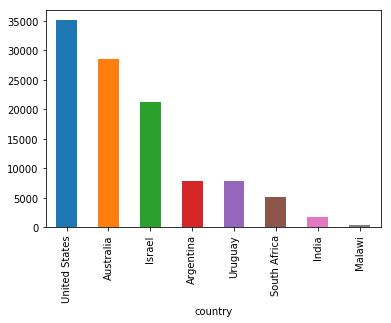

In [25]:
df['GDP percap'].plot(kind='bar')
plt.show()

```none
https://research.stlouisfed.org/fred2/series/UNRATE/downloaddata/UNRATE.csv
```


### On-Line Data Sources

Python makes it straightforward to query on line databases programmatically

An important database for economists is FRED — a vast collection of time series data maintained by the St. Louis Fed

For example, suppose that we are interested in the unemployment rate

Via FRED, the entire series for the US civilian unemployment rate can be downloaded directly by entering this URL into your browser (note that this requires an internet connection)

https://research.stlouisfed.org/fred2/series/UNRATE/downloaddata/UNRATE.csv
(Equivalently, click here: https://research.stlouisfed.org/fred2/series/UNRATE/downloaddata/UNRATE.csv)

This request returns a CSV file, which will be handled by your default application for this class of files

Alternatively, we can access the CSV file from within a Python program

This can be done with a variety of methods

We start with a relatively low level method, and then return to pandas

### Accessing Data with requests
One option is to use requests, a standard Python library for requesting data over the Internet

To begin, try the following code on your computer

In [26]:
import requests

r = requests.get('http://research.stlouisfed.org/fred2/series/UNRATE/downloaddata/UNRATE.csv')

In [27]:
url = 'http://research.stlouisfed.org/fred2/series/UNRATE/downloaddata/UNRATE.csv'
source = requests.get(url).content.decode().split("\n")
source[0]

'DATE,VALUE\r'

```none
'DATE,VALUE\r\n'
```


In [28]:
source[1]

'1948-01-01,3.4\r'

```none
'1948-01-01,3.4\r\n'
```


In [29]:
source[2]

'1948-02-01,3.8\r'

```none
'1948-02-01,3.8\r\n'
```


In [30]:
data = pd.read_csv(url, index_col=0, parse_dates=True)

In [31]:
type(data)

pandas.core.frame.DataFrame

In [32]:
data.head()  # A useful method to get a quick look at a data frame

,VALUE
DATE,
1948-01-01,3.4
1948-02-01,3.8
1948-03-01,4.0
1948-04-01,3.9
1948-05-01,3.5


In [33]:
pd.set_option('precision', 1)
data.describe()  # Your output might differ slightly

,VALUE
count,844.0
mean,5.8
std,1.6
min,2.5
25%,4.6
50%,5.6
75%,6.8
max,10.8


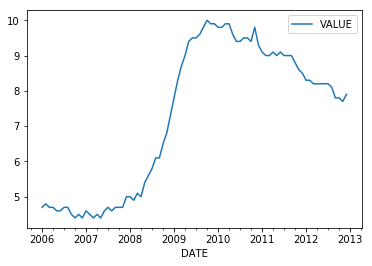

In [34]:
data['2006':'2012'].plot()
plt.show()

#### Accessing World Bank Data

Let’s look at one more example of downloading and manipulating data — this time from the World Bank

The World Bank collects and organizes data on a huge range of indicators

For example, here’s some data on government debt as a ratio to GDP

If you click on “DOWNLOAD DATA” you will be given the option to download the data as an Excel file

The next program does this for you, reads an Excel file into a pandas DataFrame, and plots time series for the US and Australia

/Users/jvsingh/anaconda/envs/py35/lib/python3.5/site-packages/pandas/util/_decorators.py:118: FutureWarning: The `sheetname` keyword is deprecated, use `sheet_name` instead
  return func(*args, **kwargs)


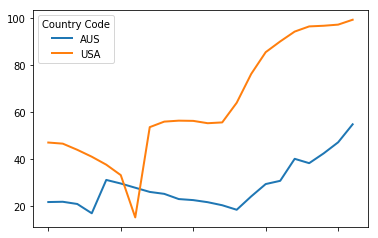

In [35]:
import matplotlib.pyplot as plt
import requests
import pandas as pd

# == Get data and read into file gd.xls == #
wb_data_query = "http://api.worldbank.org/v2/en/indicator/gc.dod.totl.gd.zs?downloadformat=excel"
r = requests.get(wb_data_query)
with open('gd.xls', 'wb') as output:
    output.write(r.content)

# == Parse data into a DataFrame == #
govt_debt = pd.read_excel('gd.xls', sheetname='Data', skiprows=3, index_col=1)

# == Take desired values and plot == #
govt_debt = govt_debt.transpose()
govt_debt = govt_debt[['AUS', 'USA']]
govt_debt = govt_debt[38:]
govt_debt.plot(lw=2)
plt.show()

In [36]:
ticker_list = {'INTC': 'Intel',
               'MSFT': 'Microsoft',
               'IBM': 'IBM',
               'BHP': 'BHP',
               'TM': 'Toyota',
               'AAPL': 'Apple',
               'AMZN': 'Amazon',
               'BA': 'Boeing',
               'QCOM': 'Qualcomm',
               'KO': 'Coca-Cola',
               'GOOG': 'Google',
               'SNE': 'Sony',
               'PTR': 'PetroChina'}

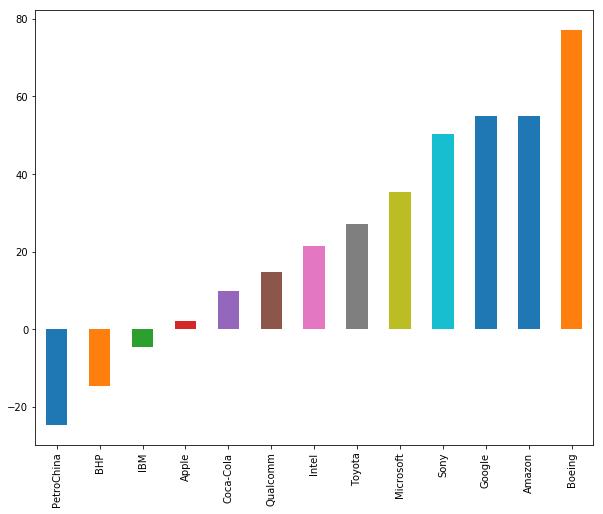

In [37]:
ticker = pd.read_csv('https://github.com/QuantEcon/QuantEcon.lectures.code/raw/master/pandas/data/ticker_data.csv')
ticker.set_index('Date', inplace=True)

ticker_list = {'INTC': 'Intel',
               'MSFT': 'Microsoft',
               'IBM': 'IBM',
               'BHP': 'BHP',
               'TM': 'Toyota',
               'AAPL': 'Apple',
               'AMZN': 'Amazon',
               'BA': 'Boeing',
               'QCOM': 'Qualcomm',
               'KO': 'Coca-Cola',
               'GOOG': 'Google',
               'SNE': 'Sony',
               'PTR': 'PetroChina'}

price_change = pd.Series()

for tick in ticker_list:
    change = 100 * (ticker.loc[ticker.index[-1], tick] - ticker.loc[ticker.index[0], tick]) / ticker.loc[ticker.index[0], tick]
    name = ticker_list[tick]
    price_change[name] = change

price_change.sort_values(inplace=True)
fig, ax = plt.subplots(figsize=(10,8))
price_change.plot(kind='bar', ax=ax)
plt.show()